In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer

DATA_IN_PATH = './data_in/KOR'

TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')
multinli_data = pd.read_csv(TRAIN_XNLI_DF, sep='\t', error_bad_lines=False)

multinli_data.head(10)

b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [4]:
multinli_data.tail()

,sentence1,sentence2,gold_label
385489,"분명히, 캘리포니아는 더 잘 할 수 있고, 더 잘해야 한다.",캘리포니아는 더 잘할 수 없다.,contradiction
385490,"한때 유럽에서 가장 아름다운 거리로 여겨졌는데, 이는 원래의 많은 건물들이 교체되었...",그래서 원래의 많은 건물들이 편의점으로 대체되었다.,neutral
385491,하우스보트는 영국 라지의 전성기의 아름답게 보존된 전통이다.,하우스보트의 전통은 영국 라지가 여전히 강해지는 동안 시작되었다.,entailment
385492,사망 기사는 그의 평론가의 신디케이트 TV 쇼에서 동료 검토 자 Roger Eber...,부고문은 아름다웠고 연예계에서의 그의 업적에 대해 현물로 쓰여졌다.,neutral
385493,"내가 해야 한다는 걸 알거나, 아니면 누가 하라고 하는 것보다 그녀를 밀고하는 것에...",남편이 요즘 너무 과로해서 이 근처에서 많은 일을 부탁할 용기가 나지 않는다.,neutral


In [5]:
len(multinli_data)

385494

In [6]:
TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.kor.tsv')

snli_data = pd.read_csv(TRAIN_SNLI_DF, sep='\t', error_bad_lines=False)
snli_data.head(10)

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [7]:
len(snli_data)

550152

In [8]:
train_data = pd.concat([multinli_data, snli_data], axis=0)
train_data.head(10)

,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [9]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()

0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [10]:
print("유일한 총 문장 수: {}".format(len(np.unique(train_set))))
print("반복해서 나타나는 문장 수: {}".format(np.sum(train_set.value_counts() > 1)))

유일한 총 문장 수: 1105355
반복해서 나타나는 문장 수: 308368


Text(0, 0.5, 'Number of sentence')

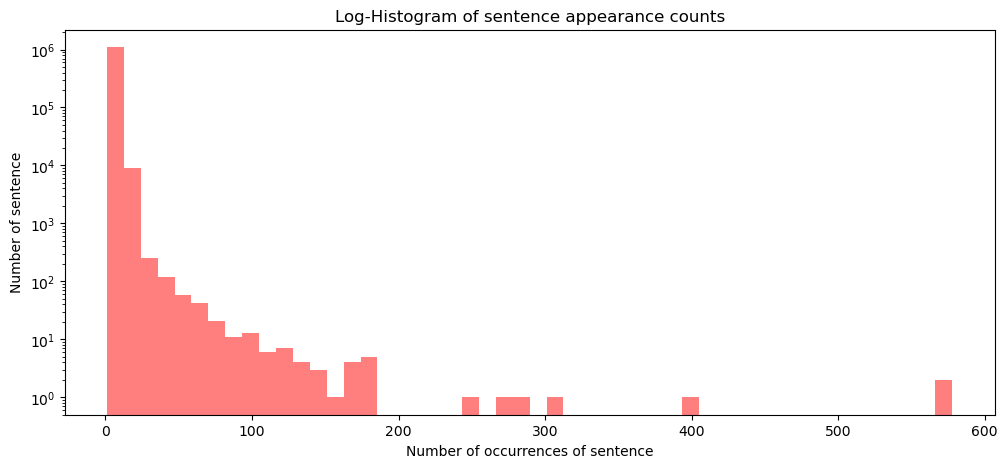

In [11]:
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of sentence appearance counts')
plt.xlabel('Number of occurrences of sentence')
plt.ylabel('Number of sentence')

In [12]:
train_set.value_counts()

남자가 밖에 있다.                               578
남자가 자고 있다.                               572
사람들이 밖에 있다.                              404
남자가 야외에 있다.                              304
여자가 밖에 있다.                               289
                                        ... 
트립은 다른 사람을 쓰러뜨리지 않았어요                      1
모든 게 괜찮아.                                  1
이 세션은 변호사 없이 이혼 소송을 제기하려는 사람들을 돕는다.        1
시간이 부족했다.                                  1
아름다운 푸른 물 위에는 바디슈트를 입은 남자가 서핑을 하고 있다.      1
Length: 1105355, dtype: int64

(array([3., 2., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 10.,  59., 108., 157., 206., 255., 304., 353., 402., 451., 500.]),
 <BarContainer object of 10 artists>)

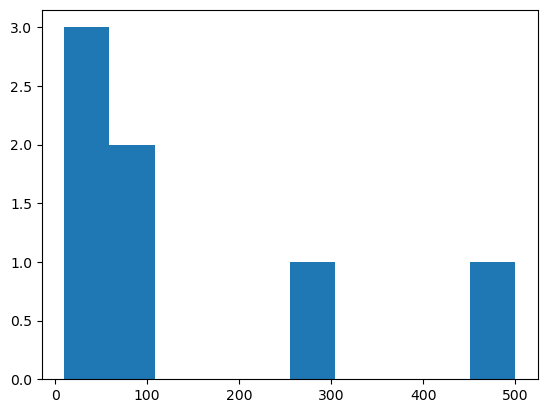

In [13]:
plt.hist([500, 300, 100, 100, 10, 10, 10])

In [14]:
train_set.value_counts()[10]

177

In [15]:
list(train_set.value_counts())

[578,
 572,
 404,
 304,
 289,
 274,
 248,
 182,
 181,
 179,
 177,
 177,
 173,
 171,
 168,
 164,
 160,
 148,
 148,
 145,
 139,
 137,
 134,
 132,
 127,
 125,
 125,
 125,
 122,
 121,
 119,
 116,
 112,
 111,
 107,
 106,
 105,
 104,
 104,
 104,
 102,
 100,
 100,
 99,
 99,
 97,
 97,
 96,
 95,
 95,
 93,
 90,
 90,
 89,
 88,
 85,
 84,
 83,
 83,
 82,
 82,
 80,
 80,
 79,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 75,
 74,
 73,
 72,
 72,
 72,
 72,
 71,
 71,
 71,
 70,
 70,
 69,
 69,
 68,
 68,
 68,
 68,
 67,
 67,
 67,
 67,
 67,
 65,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 56,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 54,
 54,
 54,
 53,
 53,
 53,
 52,
 52,
 52,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 46,
 4

In [16]:
np.sum(train_set.value_counts() == 1)

796987

In [19]:
print("중복 최대 개수: {}".format(np.max(train_set.value_counts())))
print("중복 최대 개수: {}".format(np.min(train_set.value_counts())))
print("중복 평균 개수: {}".format(np.mean(train_set.value_counts())))
print("중복 표준편차: {}".format(np.std(train_set.value_counts())))
print("중복 중간길이: {}".format(np.median(train_set.value_counts())))

print("중복 제 1사분위: {}".format(np.percentile(train_set.value_counts(), 25)))
print("중복 제 2사분위: {}".format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 578
중복 최대 개수: 1
중복 평균 개수: 1.6929330396117084
중복 표준편차: 2.2311895824512398
중복 중간길이: 1.0
중복 제 1사분위: 1.0
중복 제 2사분위: 3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2058d4ea608>,
 'caps': [<matplotlib.lines.Line2D at 0x2058d4ec9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2058d309a88>],
 'medians': [<matplotlib.lines.Line2D at 0x2058d4f0808>],
 'fliers': [<matplotlib.lines.Line2D at 0x2058d4ec608>],
 'means': [<matplotlib.lines.Line2D at 0x2058d4f0f48>]}

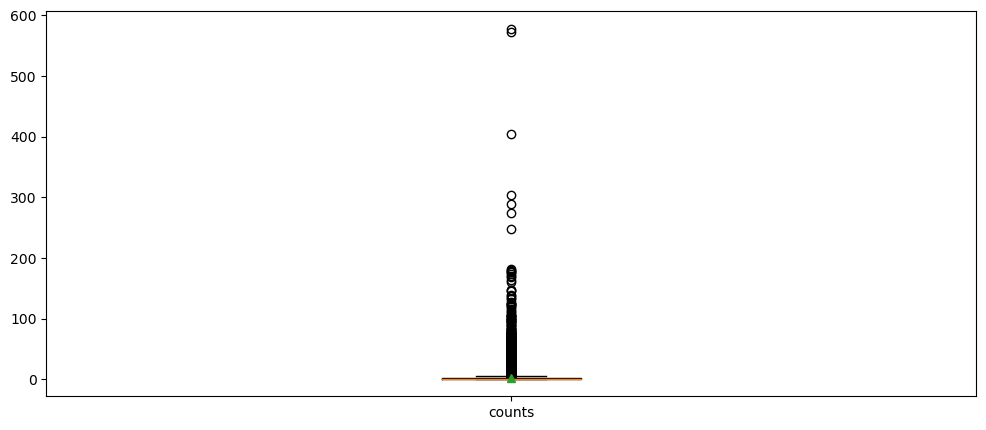

In [20]:
plt.figure(figsize=(12,5))
plt.boxplot([train_set.value_counts()],
           labels=['counts'],
           showmeans=True)

Text(0, 0.5, 'Probability')

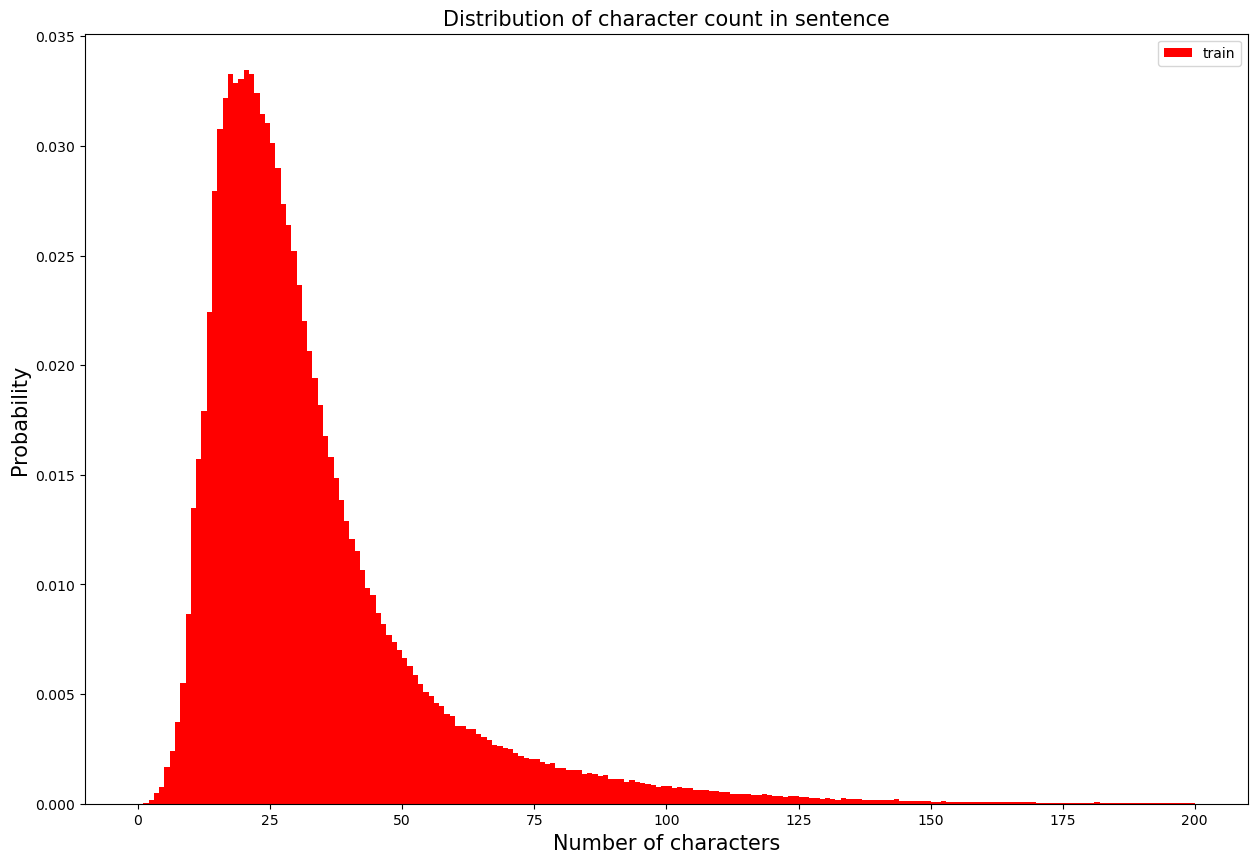

In [21]:
# 음절 단위 문장 길이 히스토그램 
train_length = train_set.apply(len)

plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', density=True, label='train')
plt.title("Distribution of character count in sentence", fontsize=15)
plt.legend()
plt.xlabel("Number of characters", fontsize=15)
plt.ylabel("Probability", fontsize=15)

In [22]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 16542
문장 길이 평균 값: 33.02
문장 길이 표준편차: 47.97
문장 길이 중간 값: 26.0
문장 길이 제 1 사분위: 19.0
문장 길이 제 3 사분위: 39.0


{'whiskers': [<matplotlib.lines.Line2D at 0x205958bf948>,
 'caps': [<matplotlib.lines.Line2D at 0x205958c4288>,
 'boxes': [<matplotlib.lines.Line2D at 0x205958bf708>],
 'medians': [<matplotlib.lines.Line2D at 0x205958c4d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x205958c4488>],
 'means': [<matplotlib.lines.Line2D at 0x205958c4bc8>]}

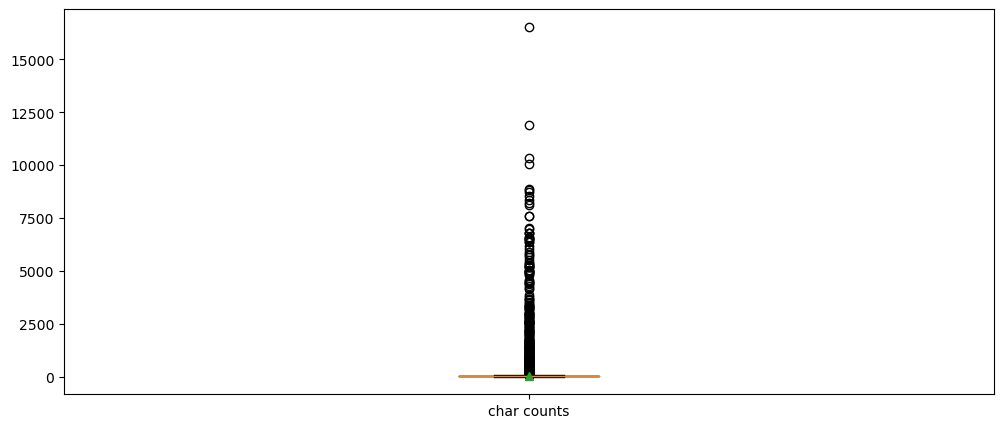

In [23]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

Text(0, 0.5, 'Probability')

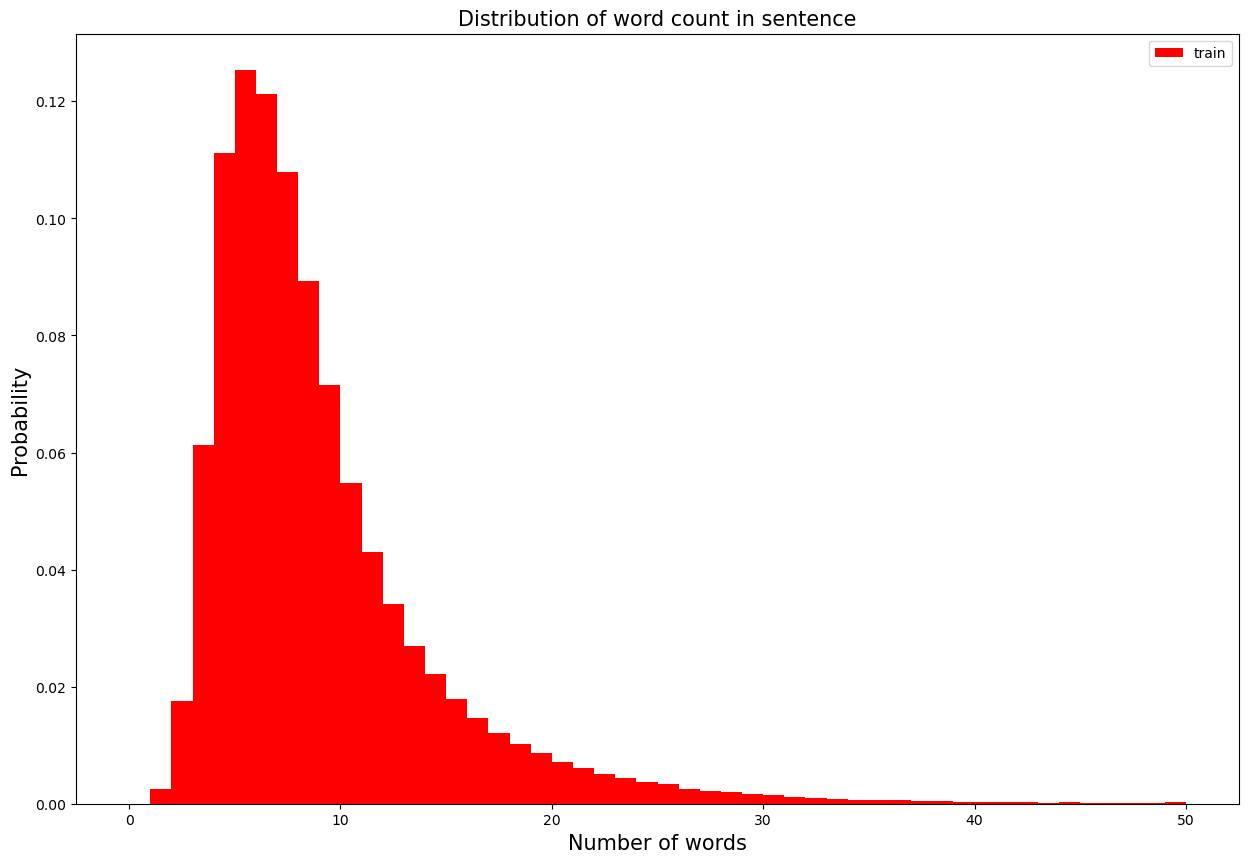

In [24]:
# 어절 단위 문장 길이 히스토그램
train_word_counts = train_set.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentence', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [25]:
print('문장 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문장 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문장 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문장 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('문장 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문장 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('문장 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

문장 단어 개수 최대 값: 3295
문장 단어 개수 평균 값: 8.64
문장 단어 개수 표준편차: 10.08
문장 단어 개수 중간 값: 7.0
문장 단어 개수 제 1 사분위: 5.0
문장 단어 개수 제 3 사분위: 10.0
문장 단어 개수 99 퍼센트: 30.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2059c7fc588>,
 'caps': [<matplotlib.lines.Line2D at 0x2059c7fcfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2059c7fc348>],
 'medians': [<matplotlib.lines.Line2D at 0x2059c804908>],
 'fliers': [<matplotlib.lines.Line2D at 0x2059c8040c8>],
 'means': [<matplotlib.lines.Line2D at 0x2059c804d88>]}

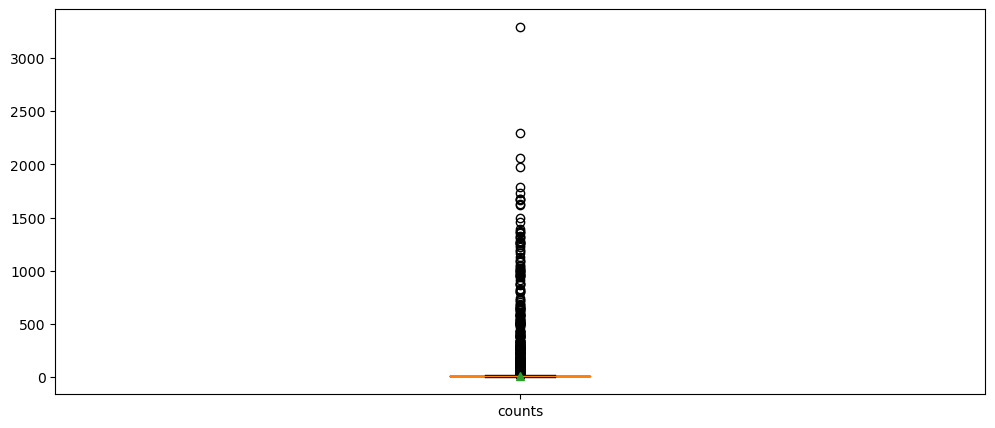

In [26]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [27]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개

print('물음표가있는 문장: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 문장: {:.2f}%'.format(math * 100))
print('마침표를 포함한 문장: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 문장: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 문장: {:.2f}%'.format(capitals * 100))
print('숫자가있는 문장: {:.2f}%'.format(numbers * 100))

물음표가있는 문장: 1.65%
수학 태그가있는 문장: 0.00%
마침표를 포함한 문장: 89.70%
첫 글자가 대문자 인 문장: 1.47%
대문자가있는 문장: 4.11%
숫자가있는 문장: 6.66%


## Tokenizer Cased 

- 버트 토크나이저로 토크나이징 

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

문장 tokens 개수 최대 값: 9006
문장 tokens 개수 평균 값: 20.24
문장 tokens 개수 표준편차: 26.77
문장 tokens 개수 중간 값: 16.0
문장 tokens 개수 제 1 사분위: 11.0
문장 tokens 개수 제 3 사분위: 24.0
문장 tokens 개수 99 퍼센트: 72.0


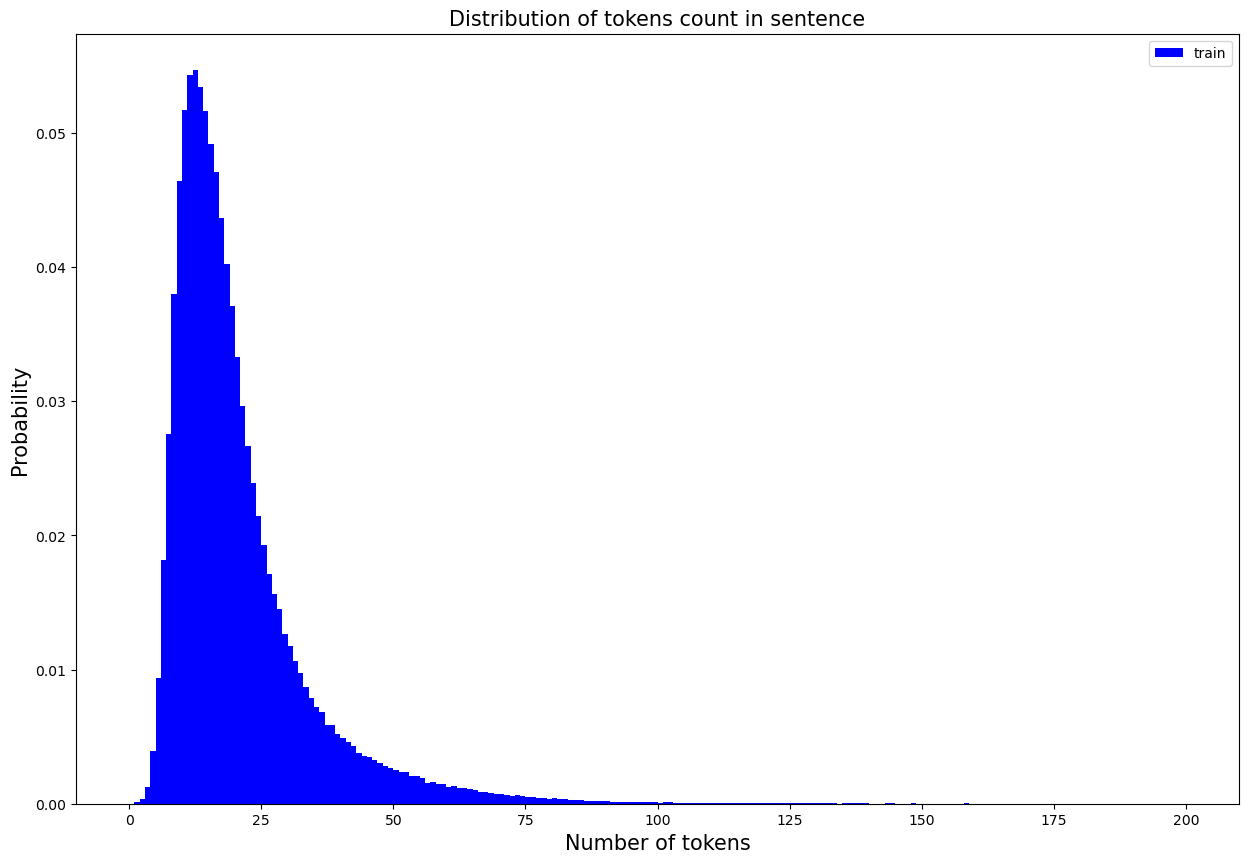

In [28]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt', do_lower_case=False)

train_bert_token_counts = train_set.apply(lambda x: len(tokenizer.tokenize(x)))

plt.figure(figsize=(15,10))
plt.hist(train_bert_token_counts, bins=200, range=[0,200], facecolor='b', density=True, label='train')
plt.title("Distribution of tokens count in sentence", fontsize=15)
plt.legend()
plt.xlabel("Number of tokens", fontsize=15)
plt.ylabel("Probability", fontsize=15)

print('문장 tokens 개수 최대 값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 평균 값: {:.2f}'.format(np.mean(train_bert_token_counts)))
print('문장 tokens 개수 표준편차: {:.2f}'.format(np.std(train_bert_token_counts)))
print('문장 tokens 개수 중간 값: {}'.format(np.median(train_bert_token_counts)))
print('문장 tokens 개수 제 1 사분위: {}'.format(np.percentile(train_bert_token_counts, 25)))
print('문장 tokens 개수 제 3 사분위: {}'.format(np.percentile(train_bert_token_counts, 75)))
print('문장 tokens 개수 99 퍼센트: {}'.format(np.percentile(train_bert_token_counts, 99)))

{'whiskers': [<matplotlib.lines.Line2D at 0x2059c9e0548>,
 'caps': [<matplotlib.lines.Line2D at 0x2059c9d4f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2059c9d4308>],
 'medians': [<matplotlib.lines.Line2D at 0x2059c9df908>],
 'fliers': [<matplotlib.lines.Line2D at 0x2059c9d4dc8>],
 'means': [<matplotlib.lines.Line2D at 0x2059c9dfd88>]}

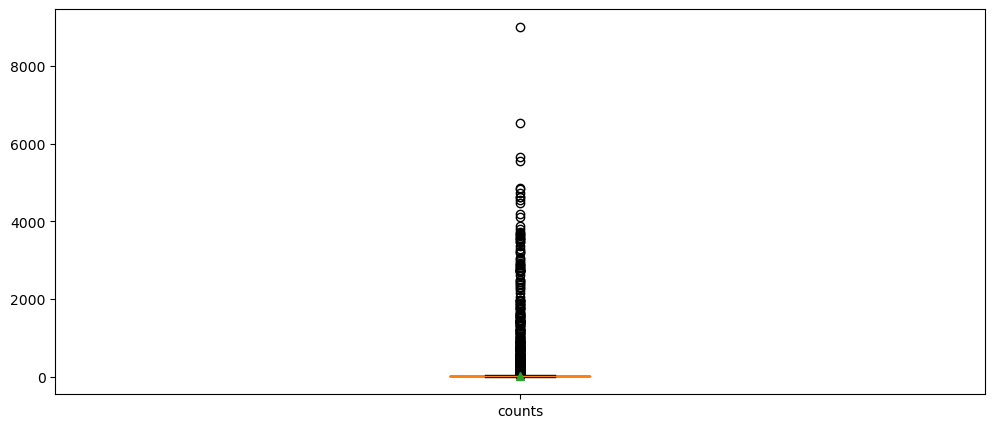

In [29]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_bert_token_counts,
             labels=['counts'],
             showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

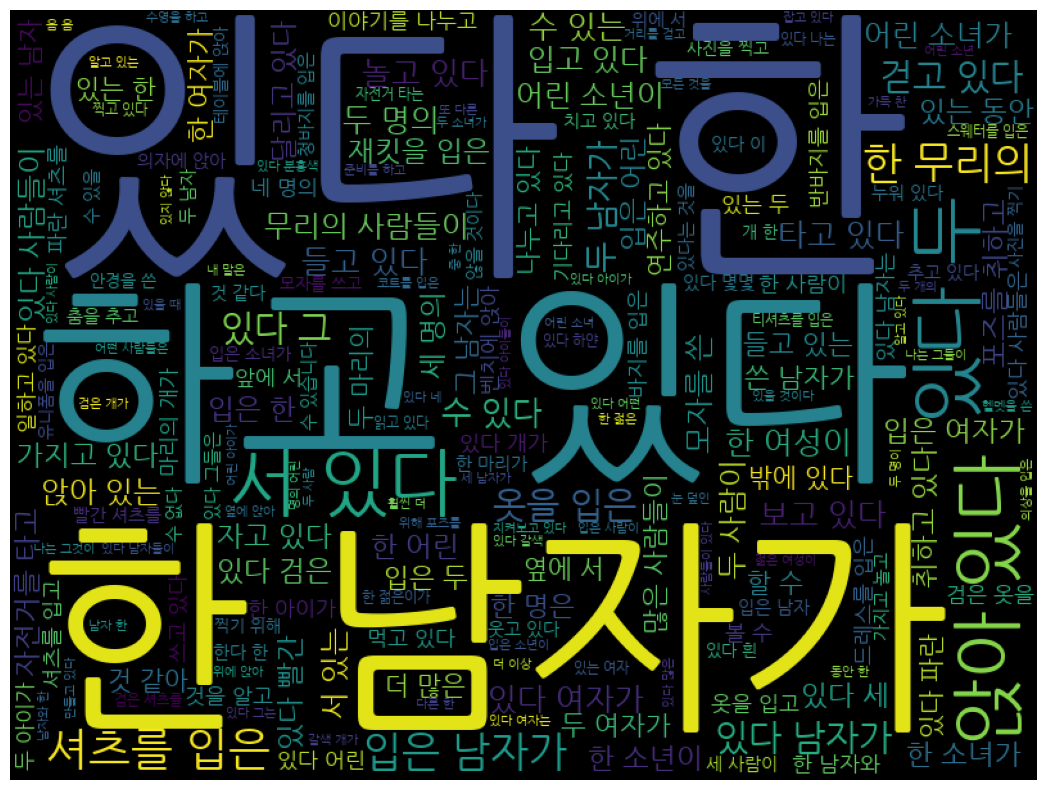

In [30]:
from wordcloud import WordCloud

font_path = os.path.join(DATA_IN_PATH, 'NanumGothic.ttf')
cloud = WordCloud(font_path=font_path, width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

In [31]:
tokenizer.tokenize(train_set[0])

['개',
 '##념',
 '##적으로',
 '크',
 '##림',
 '스',
 '##키',
 '##밍',
 '##은',
 '제',
 '##품',
 '##과',
 '지',
 '##리',
 '##라는',
 '두',
 '가지',
 '기',
 '##본',
 '차',
 '##원을',
 '가지고',
 '있다',
 '.']

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gold_label', ylabel='count'>

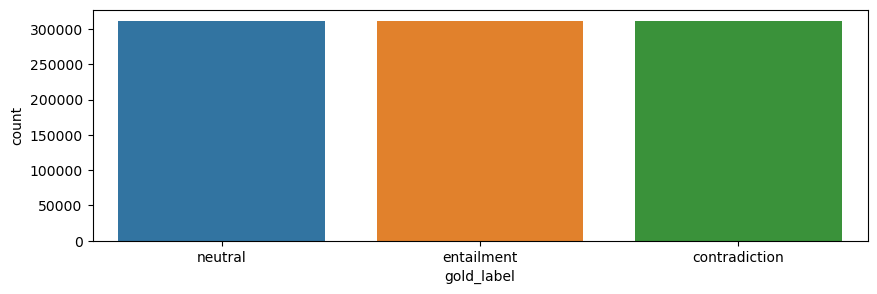

In [32]:
fig, ax = plt.subplots(ncols=1)
fig.set_size_inches(10, 3)
sns.countplot(train_data['gold_label'])

In [33]:
train_data['gold_label'].value_counts()

contradiction    311886
neutral          311862
entailment       311835
Name: gold_label, dtype: int64